# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Valentina Diamante

## What does a Simple Linear Regression Model do?
#### It works to find the relationship between two variables that can help make a prediction. It does so y comparing the dependent variable to the independent variable

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
diamonds = sns.load_dataset('diamonds') 

In [24]:
print(diamonds.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


## Pearson Correlation Coefficient (r-value)
- Measures the  type and strength of the linear correlations bewtween two variables
- The value ranges from 1.0 to -1.0
- r-values larger than 0 indicates positive correlation
- r-values smaller than 0 indicates negative correlation
- r-values equal to 0  indicates no correlation

In [27]:
diamonds.head(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [31]:
numeric_data = diamonds.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix['price'].head(7))

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


<Axes: >

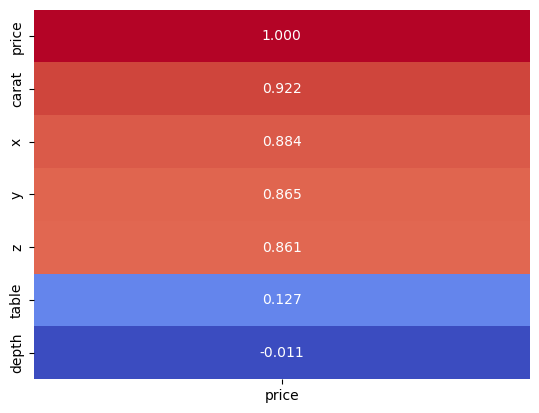

In [33]:
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True, fmt=".3f", cmap='coolwarm', cbar=False)


## Procedure for Creating and Using a Regression Model
1. Split the dataset into a training dataset
2. Use the trianing dataset to create the regression model
3. Run the dataset against the model to validate the model
4. If validated, use the model to make predictions

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(diamonds[['carat']], diamonds[['price']], test_size=0.30, random_state=20)


In [40]:
model = LinearRegression()
print(model)

LinearRegression()


In [42]:
model.fit(x_train, y_train)

LinearRegression()

In [44]:
model.score(x_test, y_test)

0.8504107786474793

In [46]:
y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871521],
       [-464.18539337],
       [5507.68827094]])

In [48]:
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])
predicted.head(3)

,price_predicted
0,9540.641914
1,1940.075433
2,3180.984246


In [50]:
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])
combined.head()

,price_predicted,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [52]:
melted = pd.melt(combined, id_vars=['carat'], 
                 value_vars=['price','price_predicted'], 
                 var_name='price_type', value_name='price_value')
print(melted)

       carat       price_type  price_value
0       1.52            price  8674.000000
1       0.54            price  1637.000000
2       0.70            price  2657.000000
3       0.59            price  1838.000000
4       0.86            price  2980.000000
...      ...              ...          ...
32359   0.31  price_predicted   156.269013
32360   1.01  price_predicted  5585.245072
32361   1.53  price_predicted  9618.198715
32362   0.23  price_predicted  -464.185393
32363   1.00  price_predicted  5507.688271

[32364 rows x 3 columns]


/var/folders/4y/0vfxws0x2yx09h18b2blq_140000gn/T/ipykernel_51482/1717859288.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted, x='carat', y='price_value', hue='price_type', ci=None)


<Axes: xlabel='carat', ylabel='price_value'>

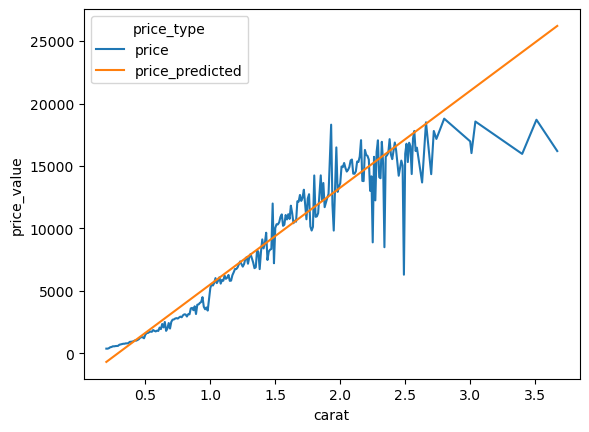

In [54]:
sns.lineplot(data=melted, x='carat', y='price_value', hue='price_type', ci=None)


## Regression line equation is **y = mx + b**, where...
- y is the **dependent** variable
- m is the **slope** of the line
- x is the **independent** variable
- b is the **Y-intercept**

In [59]:
X = diamonds.carat.values.reshape(-1,1)
y = diamonds.price

In [61]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [63]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.36058004672


In [65]:
print(f'Regression line equation is y = [{m[0]}]x + {b}')

Regression line equation is y = [7756.425617970086]x + -2256.36058004672


In [67]:
carat = 0.70
predicted_price = m[0] * carat + b  
print(f'The predicted price for a {carat} carat diamond is ${predicted_price:.2f}')



The predicted price for a 0.7 carat diamond is $3173.14


In [69]:
carat = 0.54
predicted_price = m[0] * carat + b  
print(f'The predicted price for a {carat} carat diamond is ${predicted_price:.2f}')


The predicted price for a 0.54 carat diamond is $1932.11


## Are the estimates in the previous two cells close to the predicted prices in the results of step 18?

### The predicted prices for 0.70 and 0.54 carats are significantly higher